<a href="https://colab.research.google.com/github/MochalovaDaria/my-progs/blob/main/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Монтируем Google Диск
drive.mount('/content/drive')

# Указываем путь к папке на Google Диске
base_path = '/content/drive/My Drive/quadratic_equations'
os.makedirs(f'{base_path}/less_than_zero', exist_ok=True)
os.makedirs(f'{base_path}/equal_to_zero', exist_ok=True)
os.makedirs(f'{base_path}/greater_than_zero', exist_ok=True)
os.makedirs(f'{base_path}/random_equations', exist_ok=True)

# Функция для генерации квадратного уравнения
def generate_quadratic(a, b, c):
    return f"{a}x² + {b}x + {c} = 0"

# Функция для вычисления дискриминанта
def discriminant(a, b, c):
    return b**2 - 4*a*c

# Генерация изображений
count_less_than_zero = 0
count_equal_to_zero = 0
count_greater_than_zero = 0
count_random = 0

# Генерация изображений с дискриминантом
while count_less_than_zero < 50 or count_equal_to_zero < 50 or count_greater_than_zero < 50:
    # Генерируем коэффициенты
    a = np.random.randint(1, 10)
    b = np.random.randint(-10, 10)
    c = np.random.randint(-10, 10)

    D = discriminant(a, b, c)
    equation = generate_quadratic(a, b, c)

    # Создаем изображение
    plt.figure(figsize=(6, 4))
    plt.text(0.5, 0.5, equation, fontsize=20, ha='center', va='center')
    plt.axis('off')

    # Сохраняем изображение в соответствующую папку
    if D < 0 and count_less_than_zero < 50:
        plt.savefig(f'{base_path}/less_than_zero/equation_{count_less_than_zero}.png')
        count_less_than_zero += 1
    elif D == 0 and count_equal_to_zero < 50:
        plt.savefig(f'{base_path}/equal_to_zero/equation_{count_equal_to_zero}.png')
        count_equal_to_zero += 1
    elif D > 0 and count_greater_than_zero < 50:
        plt.savefig(f'{base_path}/greater_than_zero/equation_{count_greater_than_zero}.png')
        count_greater_than_zero += 1

    plt.close()

# Генерация случайных квадратных уравнений
while count_random < 25:
    # Генерируем коэффициенты
    a = np.random.randint(1, 10)
    b = np.random.randint(-10, 10)
    c = np.random.randint(-10, 10)

    equation = generate_quadratic(a, b, c)

    # Создаем изображение
    plt.figure(figsize=(6, 4))
    plt.text(0.5, 0.5, equation, fontsize=20, ha='center', va='center')
    plt.axis('off')

    # Сохраняем изображение в папку случайных уравнений
    plt.savefig(f'{base_path}/random_equations/equation_{count_random}.png')
    count_random += 1

    plt.close()

print("Генерация изображений завершена.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Генерация изображений завершена.


In [1]:
!pip install tensorflow==2.12.1

In [2]:
from keras.models import load_model
from PIL import Image, ImageOps, ImageDraw, ImageFont
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

model = load_model("keras_model.h5", compile=False)
class_names = open("labels.txt", "r").readlines()

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

    image_array = np.asarray(image, dtype=np.float32)

    normalized_image_array = (image_array / 127.5) - 1

    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array

    prediction = model.predict(data)
    index = np.argmax(prediction)
    class_name = class_names[index].strip()
    confidence_score = prediction[0][index]

    return index, class_name, confidence_score

Saving equation_21.png to equation_21.png
1/1 [==============================] - 0s 58ms/step


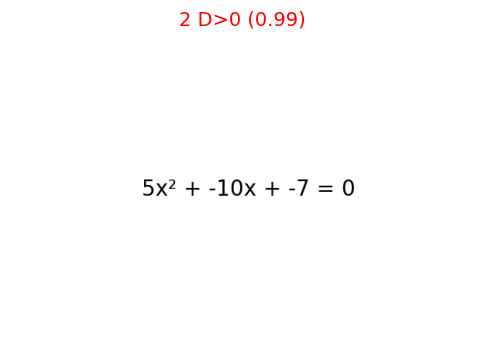

D>0, вероятность: 0.99


In [6]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

index, predicted_class, confidence = predict_image(image_path)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")
plt.title(f"{predicted_class} ({confidence:.2f})", fontsize=14, color="red")
plt.show()


if index == 0:
    print(f"D<0, вероятность: {confidence:.2f}")
elif index == 1:
    print(f"D=0, вероятность: {confidence:.2f}")
elif index == 2:
    print(f"D>0, вероятность: {confidence:.2f}")
